# Задача к лекции "Восстановление кривой доходности"
Взять значения базовых ставок https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/base-rates
и цену процентных свопов https://sebgroup.com/large-corporates-and-institutions/prospectuses-and-downloads/rates/swap-rates
Восстановить кривую для Вашей валюты 

In [2]:
def getVariant(email):
    ccy = ['NOK', 'SEK', 'DKK', 'EUR']
    h = hash(email)
    ccy1 = ccy[h % 4]
    print 'Task 1: 5Y curve for ' + ccy1
getVariant('pelman31@yandex.ru')

Task 1: 5Y curve for EUR


In [1]:

s0 = 0.0
s1 = -0.41*1e-2
s2 = -0.42*1e-2
s3 = -0.41*1e-2
s4 = -0.39*1e-2
s5 = -0.36*1e-2

r0 = s0

import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as plt

def DF(L,m):
    return 1.0 / (1.0 + L*m/12)

def DF_exp(L,m):
    return np.exp(-L*m/12)

-0.004093669258747425
-0.004185481043181982
-0.004078695216263395
-0.0038712430060133867
-0.0035742173739755343


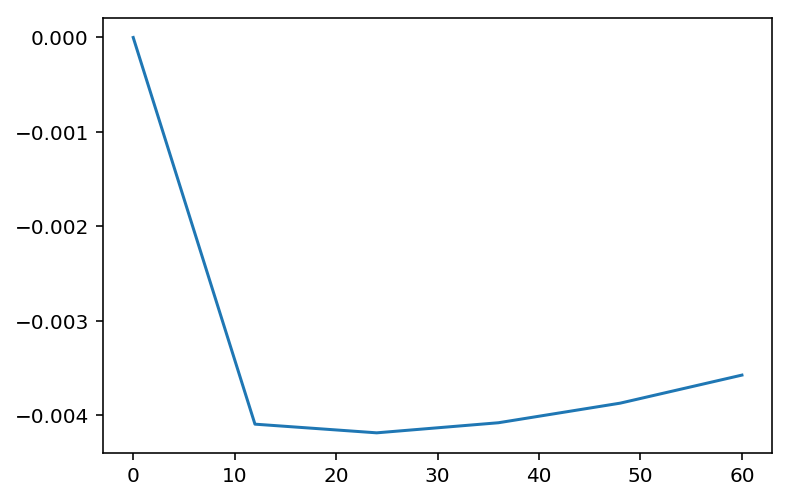

In [6]:
#линейная аппроксимация

def S1(r12, r0, s1):
    r6 = 0.5* (r0 + r12)
    df6 = DF(r6, 6)
    df12 = DF(r12, 12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s1

def S2(r24, r12, r0, s2):
    r6 = 0.5 * (r0 + r12)
    r18 = 0.5 * (r12 + r24)
    df6 = DF(r6,6)
    df12 = DF(r12,12)
    df18 = DF(r18,18)
    df24 = DF(r24,24)
    price = 2*(1-df24)/(df6+df12+df18+df24)
    return price - s2

def S3(r36, r24, r12, r0, s3):
    r6 = 0.5 * (r0 + r12)
    r18 = 0.5 * (r12 + r24)
    r30 = 0.5 * (r24 + r36)
    df6 = DF(r6,6)
    df12 = DF(r12,12)
    df18 = DF(r18,18)
    df24 = DF(r24,24)
    df30 = DF(r30,30)
    df36 = DF(r36,36)
    tmp = df6+df12+df18+df24+df30+df36
    price = 2*(1-df36)/(df6+df12+df18+df24+df30+df36)
    return price - s3

def S4(r48, r36, r24, r12, r0, s4):
    r6 = 0.5 * (r0 + r12)
    r18 = 0.5 * (r12 + r24)
    r30 = 0.5 * (r24 + r36)
    r42 = 0.5 * (r36 + r48)
    df6 = DF(r6,6)
    df12 = DF(r12,12)
    df18 = DF(r18,18)
    df24 = DF(r24,24)
    df30 = DF(r30,30)
    df36 = DF(r36,36)
    df42 = DF(r42,42)
    df48 = DF(r48,48)
    tmp = df6+df12+df18+df24+df30+df36+df42+df48
    price = 2*(1-df48)/tmp
    return price - s4

def S5(r60, r48, r36, r24, r12, r0, s5):
    r6 = 0.5 * (r0 + r12)
    r18 = 0.5 * (r12 + r24)
    r30 = 0.5 * (r24 + r36)
    r42 = 0.5 * (r36 + r48)
    r54 = 0.5 * (r48 + r60)
    df6 = DF(r6,6)
    df12 = DF(r12,12)
    df18 = DF(r18,18)
    df24 = DF(r24,24)
    df30 = DF(r30,30)
    df36 = DF(r36,36)
    df42 = DF(r42,42)
    df48 = DF(r48,48)
    df54 = DF(r54,54)
    df60 = DF(r60,60)
    tmp = df6+df12+df18+df24+df30+df36+df42+df48+df54+df60
    price = 2*(1-df60)/tmp
    return price - s5

r12 = scipy.optimize.broyden1(lambda x: S1(x, r0, s1), r0)
r24 = scipy.optimize.broyden1(lambda x: S2(x, r12, r0, s2), r12)
r36 = scipy.optimize.broyden1(lambda x: S3(x, r24, r12, r0, s3), r24) #при подстановке в качестве начального приближения r24, метод не сходился из-за превышения числа итераций, если брать константы около него, то получается примерно -0
r48 = scipy.optimize.broyden1(lambda x: S4(x, r36, r24, r12, r0, s4), -0.21)
r60 = scipy.optimize.broyden1(lambda x: S5(x, r48, r36, r24, r12, r0, s5), r48)

print(r12)
print(r24)
print(r36)
print(r48)
print(r60)

plt.plot([0, 12, 24, 36, 48, 60], [r0, r12, r24, r36, r48, r60])


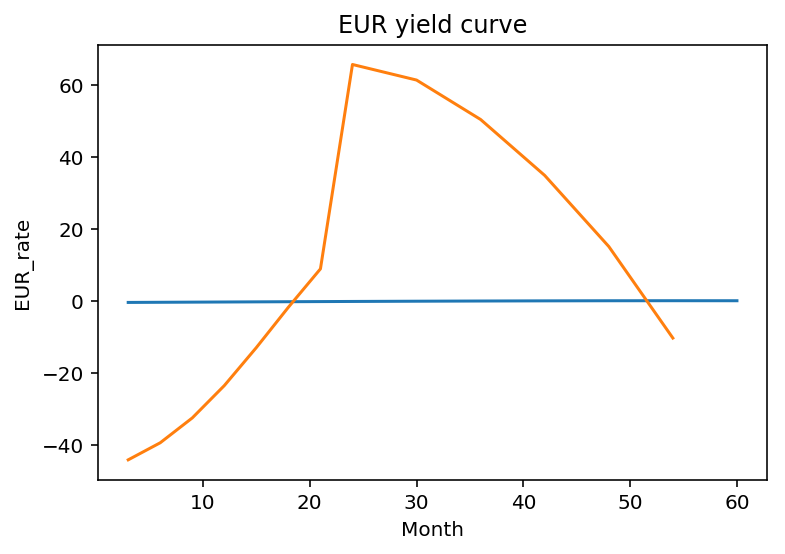

In [7]:
#интерполяция сплайнами

global tenors
tenors = [3, 6, 9, 12, 15, 18, 21, 24, 30, 36, 42, 48, 54, 60]
#данные от 28.02.2020 с сайта global-rates.com
L3 = -0.47
L6 = -0.43
L12 = -0.35
S5 = -0.36*1e-2

def getLibors(L3, L6, L12, L60):
    knownMonths = [3, 6, 12, 60]
    knownY = [L3, L6, L12, L60]
    f = scipy.interpolate.interp1d(knownMonths, knownY, 'cubic')
    return f(tenors) 

def get3M(libor, step=3):
    monthly = []
    for i in xrange(len(libors)-1):
        df1=DF(libor[i],(i+1)*step)
        df2=DF(libor[i+1],(i+2)*step)
        r = (df1 / df2 - 1)/step*12*100
        monthly.append(r)
    return monthly

def showPlot(tenors, libors):
    plt.title('EUR yield curve')
    plt.xlabel('Month')
    plt.ylabel('EUR_rate')
    plt.plot(tenors, libors)
    plt.plot(tenors[0:-1], get3M(libors))
    
def F(x, S5, L3, L6, L12):
    S5 = 0.01*S5
    D6 = DF(L6,6)
    D12 = DF(L12,12)
    f = scipy.interpolate.interp1d([3,6,12,60], [L3,L6,L12,x], 'cubic')
    L18 = f(18)
    D18 = DF(L18, 18)
    L24 = f(24)
    D24 = DF(L24, 24)
    L30 = f(30)
    D30 = DF(L30, 30)
    L36 = f(36)
    D36 = DF(L36, 36)
    L42 = f(42)
    D42 = DF(L42, 42)
    L48 = f(48)
    D48 = DF(L48, 48)
    L54 = f(54)
    D54 = DF(L54, 54)
    D60 = DF(x, 60)
    return (1 - D60)/(0.5*S5*(D6 + D12 + D18 + D24 + D30 + D36 + D42 + D48 + D54 + D60))

L60 = scipy.optimize.broyden1(lambda x: F(x,S5,L3,L6,L12), 1.0, f_tol=1e-6)
libors=getLibors(L3, L6, L12, L60) 
showPlot(tenors, libors)

[-0.00410421]
[-0.00420421]
[-0.00342038]
[-0.00292873]
[-0.00252405]


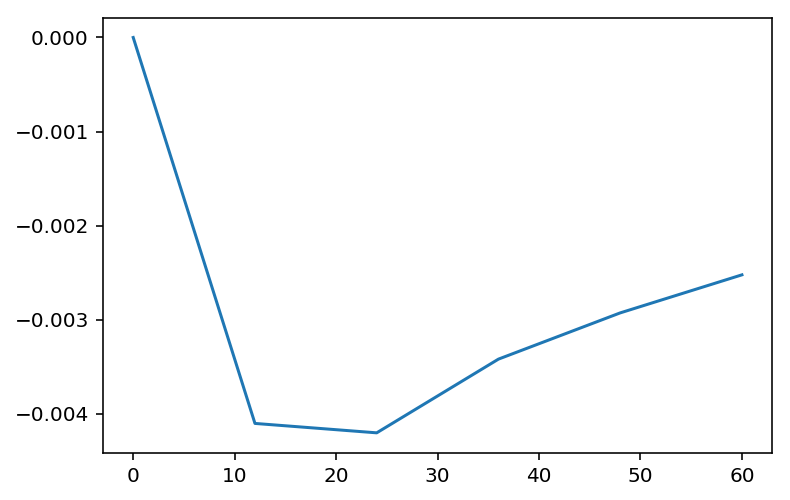

In [5]:
#лог-линейная аппроксимация

def DF_exp(L,m):
    return np.exp(-L*m/12)


def S1_loglin(r12, r0, s):
    df12 = DF_exp(r12, 12)

    df6 = np.sqrt(df12)
    price = 2*(1 - df12) / (df6 + df12)
    return price - s

def S2_loglin(r24, r12, r0, s):
    df24 = DF_exp(r24, 24)
    df12 = DF_exp(r12, 12)

    df18 = np.sqrt(df24 * df12)
    df6 = np.sqrt(df12)
    price = 2*(1 - df24) / (df6 + df12 + df18 + df24)
    return price - s

def S3_loglin(r36, r24, r12, r0, s):
    df36 = DF_exp(r36, 36)
    df24 = DF_exp(r24, 24)
    df12 = DF_exp(r12, 12)

    df30 = np.sqrt(df36 * df24)
    df18 = np.sqrt(df24 * df12)
    df6 = np.sqrt(df12)
    price = 2*(1 - df36) / (df6 + df12 + df18 + df24 + df36)
    return price - s

def S4_loglin(r48, r36, r24, r12, r0, s):
    df48 = DF_exp(r48,48)
    df36 = DF_exp(r36, 36)
    df24 = DF_exp(r24, 24)
    df12 = DF_exp(r12, 12)

    df42 = np.sqrt(df48 * df36)
    df30 = np.sqrt(df36 * df24)
    df18 = np.sqrt(df24 * df12)
    df6 = np.sqrt(df12)
    price = 2*(1 - df48) / (df6 + df12 + df18 + df24 + df36 + df48)
    return price - s

def S5_loglin(r60, r48, r36, r24, r12, r0, s):
    df60 = DF_exp(r60, 60)
    df48 = DF_exp(r48, 48)
    df36 = DF_exp(r36, 36)
    df24 = DF_exp(r24, 24)
    df12 = DF_exp(r12, 12)

    df54 = np.sqrt(df60 * df48)
    df42 = np.sqrt(df48 * df36)
    df30 = np.sqrt(df36 * df24)
    df18 = np.sqrt(df24 * df12)
    df6 = np.sqrt(df12)
    price = 2*(1 - df60) / (df6 + df12 + df18 + df24 + df36 + df48 + df60)
    return price - s


r12_loglin = scipy.optimize.fsolve(lambda x: S1_loglin(x, r0, s1), r0)
r24_loglin = scipy.optimize.fsolve(lambda x: S2_loglin(x, r12_loglin, r0, s2), r12_loglin)
r36_loglin = scipy.optimize.fsolve(lambda x: S3_loglin(x, r24_loglin, r12_loglin, r0, s3), r24_loglin)
r48_loglin = scipy.optimize.fsolve(lambda x: S4_loglin(x, r36_loglin, r24_loglin, r12_loglin, r0, s4), r36_loglin)
r60_loglin = scipy.optimize.fsolve(lambda x: S5_loglin(x, r48_loglin, r36_loglin, r24_loglin, r12_loglin, r0, s5), r48_loglin)

print(r12_loglin)
print(r24_loglin)
print(r36_loglin)
print(r48_loglin)
print(r60_loglin)

plt.plot([0,12,24,36,48,60], [r0, r12_loglin, r24_loglin, r36_loglin, r48_loglin, r60_loglin])